In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 26.6 MB/s 
     |████████████████████████████████| 9.8 MB 62.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
!pip install bayesian-optimization


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11685 sha256=63c651a135bbc792fdd33e48db998843b9c266c94000fa594e4173e4af4425dc
  Stored in directory: /root/.cache/pip/wheels/fd/9b/71/f127d694e02eb40bcf18c7ae9613b88a6be4470f57a8528c5b
Successfully built bayesian-optimization


In [ ]:
!pip install shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 32.3 MB/s 


In [ ]:
!pip install pystan==2.19.1.1 fbprophet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 88 kB/s 
     |████████████████████████████████| 64 kB 2.8 MB/s 
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
Failed to build fbprophet
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.4
    Uninstalling cmdstanpy-1.0.4:
      Successfully uninstalled cmdstanpy-1.0.4
    Running setup.py install for fbprophet ... done
  DEPRECATION: fbprophet was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.
ERROR: pip's dependency resolv

In [ ]:
!pip install gluonts


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 17.4 MB/s 


In [ ]:
!pip install tqdm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install mxnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49.1 MB 2.0 MB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [ ]:
import mxnet as mx


In [ ]:
import pickle
import warnings
from math import sqrt

import lightgbm as lgb
import matplotlib as mpl
import numpy as np
import pandas as pd  # Basic library for all of our dataset operations
import pmdarima as pm
import tensorflow as tf
import xgboost as xgb
from bayes_opt import BayesianOptimization
from fbprophet import Prophet
from gluonts.dataset.common import ListDataset
from gluonts.evaluation.backtest import make_evaluation_predictions
from gluonts.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer
from matplotlib import pyplot as plt
from sklearn import linear_model, svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from tqdm import tqdm



# We will use deprecated models of statmodels which throw a lot of warnings to use more modern ones
warnings.filterwarnings("ignore")


# Extra settings
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
plt.style.use('bmh')
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'
mpl.rcParams['figure.figsize'] = 18, 8

print(tf.__version__)

2.8.2


In [ ]:
import warnings

import matplotlib as mpl
import numpy as np
import pandas as pd  # Basic library for all of our dataset operations
import statsmodels as sm
import tensorflow as tf
from matplotlib import pyplot as plt
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa import api as smt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [ ]:
bitcoin = pd.read_excel('/content/Final_Dataset_1Aug.xlsx', parse_dates=['Date'])
bitcoin.set_index('Date', inplace=True)
bitcoin.head(2000)

,XBTUSD,SPX Index,MXEU Index,NKY Index,SHCOMP Index,SENSEX Index,MCX Index,CO1 Comdty,XAU Index
Date,,,,,,,,,
2022-07-12,19443.28,3818.80,140.90563,192.68847,487.95774,678.29679,22458.14286,99.49,105.66
2022-07-11,20409.54,3854.43,140.24748,195.14047,493.16624,684.36393,22385.86703,107.10,107.60
2022-07-10,20972.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-09,21672.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-08,21846.53,3899.38,142.36291,194.73592,501.31118,687.18793,22731.47461,107.02,108.97
...,...,...,...,...,...,...,...,...,...
2017-07-11,2328.94,2425.53,146.41930,177.23107,NaN,NaN,NaN,NaN,80.43
2017-07-10,2384.54,2427.43,146.79655,175.90207,NaN,NaN,NaN,NaN,79.93
2017-07-09,2527.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
bitcoin.columns

Index(['XBTUSD', 'SPX Index', 'MXEU Index', 'NKY Index', 'SHCOMP Index',
       'SENSEX Index', 'MCX Index', 'CO1 Comdty', 'XAU Index'],
      dtype='object')

In [ ]:
bf = bitcoin.iloc[::-1]
bf

,XBTUSD,SPX Index,MXEU Index,NKY Index,SHCOMP Index,SENSEX Index,MCX Index,CO1 Comdty,XAU Index
Date,,,,,,,,,
2017-07-06,2597.68,2409.75,146.67779,176.45451,NaN,NaN,NaN,NaN,78.98
2017-07-07,2514.87,2425.18,146.41495,174.73994,NaN,NaN,NaN,NaN,77.50
2017-07-09,2527.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-10,2384.54,2427.43,146.79655,175.90207,NaN,NaN,NaN,NaN,79.93
2017-07-11,2328.94,2425.53,146.41930,177.23107,NaN,NaN,NaN,NaN,80.43
...,...,...,...,...,...,...,...,...,...
2022-07-08,21846.53,3899.38,142.36291,194.73592,501.31118,687.18793,22731.47461,107.02,108.97
2022-07-09,21672.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-10,20972.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#we will check the null values 
bf.isnull()

,XBTUSD,SPX Index,MXEU Index,NKY Index,SHCOMP Index,SENSEX Index,MCX Index,CO1 Comdty,XAU Index
Date,,,,,,,,,
2017-07-06,False,False,False,False,True,True,True,True,False
2017-07-07,False,False,False,False,True,True,True,True,False
2017-07-09,False,True,True,True,True,True,True,True,True
2017-07-10,False,False,False,False,True,True,True,True,False
2017-07-11,False,False,False,False,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...
2022-07-08,False,False,False,False,False,False,False,False,False
2022-07-09,False,True,True,True,True,True,True,True,True
2022-07-10,False,True,True,True,True,True,True,True,True


In [ ]:
bf = bf.fillna(method='ffill')
bf

,XBTUSD,SPX Index,MXEU Index,NKY Index,SHCOMP Index,SENSEX Index,MCX Index,CO1 Comdty,XAU Index
Date,,,,,,,,,
2017-07-06,2597.68,2409.75,146.67779,176.45451,NaN,NaN,NaN,NaN,78.98
2017-07-07,2514.87,2425.18,146.41495,174.73994,NaN,NaN,NaN,NaN,77.50
2017-07-09,2527.97,2425.18,146.41495,174.73994,NaN,NaN,NaN,NaN,77.50
2017-07-10,2384.54,2427.43,146.79655,175.90207,NaN,NaN,NaN,NaN,79.93
2017-07-11,2328.94,2425.53,146.41930,177.23107,NaN,NaN,NaN,NaN,80.43
...,...,...,...,...,...,...,...,...,...
2022-07-08,21846.53,3899.38,142.36291,194.73592,501.31118,687.18793,22731.47461,107.02,108.97
2022-07-09,21672.98,3899.38,142.36291,194.73592,501.31118,687.18793,22731.47461,107.02,108.97
2022-07-10,20972.87,3899.38,142.36291,194.73592,501.31118,687.18793,22731.47461,107.02,108.97


In [ ]:
bf = bf.fillna(method='bfill')
bf

,XBTUSD,SPX Index,MXEU Index,NKY Index,SHCOMP Index,SENSEX Index,MCX Index,CO1 Comdty,XAU Index
Date,,,,,,,,,
2017-07-06,2597.68,2409.75,146.67779,176.45451,480.00682,497.01333,25094.32078,48.42,78.98
2017-07-07,2514.87,2425.18,146.41495,174.73994,480.00682,497.01333,25094.32078,48.42,77.50
2017-07-09,2527.97,2425.18,146.41495,174.73994,480.00682,497.01333,25094.32078,48.42,77.50
2017-07-10,2384.54,2427.43,146.79655,175.90207,480.00682,497.01333,25094.32078,48.42,79.93
2017-07-11,2328.94,2425.53,146.41930,177.23107,480.00682,497.01333,25094.32078,48.42,80.43
...,...,...,...,...,...,...,...,...,...
2022-07-08,21846.53,3899.38,142.36291,194.73592,501.31118,687.18793,22731.47461,107.02,108.97
2022-07-09,21672.98,3899.38,142.36291,194.73592,501.31118,687.18793,22731.47461,107.02,108.97
2022-07-10,20972.87,3899.38,142.36291,194.73592,501.31118,687.18793,22731.47461,107.02,108.97


In [ ]:
bf.describe()

,XBTUSD,SPX Index,MXEU Index,NKY Index,SHCOMP Index,SENSEX Index,MCX Index,CO1 Comdty,XAU Index
count,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000
mean,20190.988292,3370.058322,154.381147,217.878619,478.386990,591.529099,26564.187325,66.578562,109.724458
std,17878.849403,704.927534,16.281130,29.033493,58.967275,110.285676,3360.424935,19.365265,30.175475
min,1865.670000,2237.400000,101.160520,149.962220,358.387240,340.407210,14824.718350,19.330000,61.840000
25%,7120.480000,2781.010000,143.601290,196.981080,420.875010,512.254190,24376.424600,55.950000,82.040000
50%,10182.760000,3120.180000,152.699690,209.363370,487.817360,553.286770,26577.764100,65.740000,105.130000
75%,36168.200000,4019.870000,165.573040,246.104740,528.420290,688.175420,28558.536080,74.780000,137.780000
max,67734.040000,4796.560000,186.098940,287.730190,578.150150,828.967620,33567.601910,127.980000,167.760000


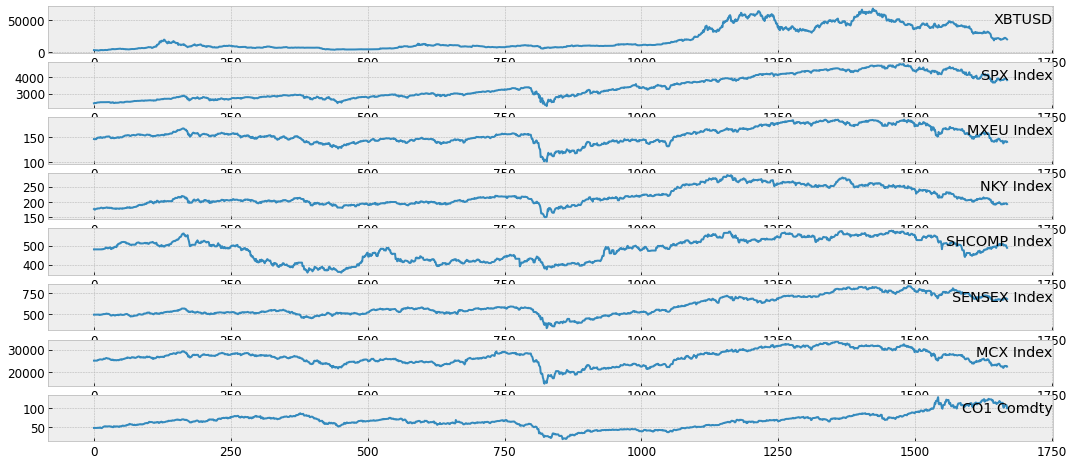

In [ ]:
values = bf.values
groups = [0, 1, 2, 3, 4, 5, 6, 7]
i = 1
# plot each column
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(bf.columns[group], y=0.5, loc='right')
    i += 1


plt.show()

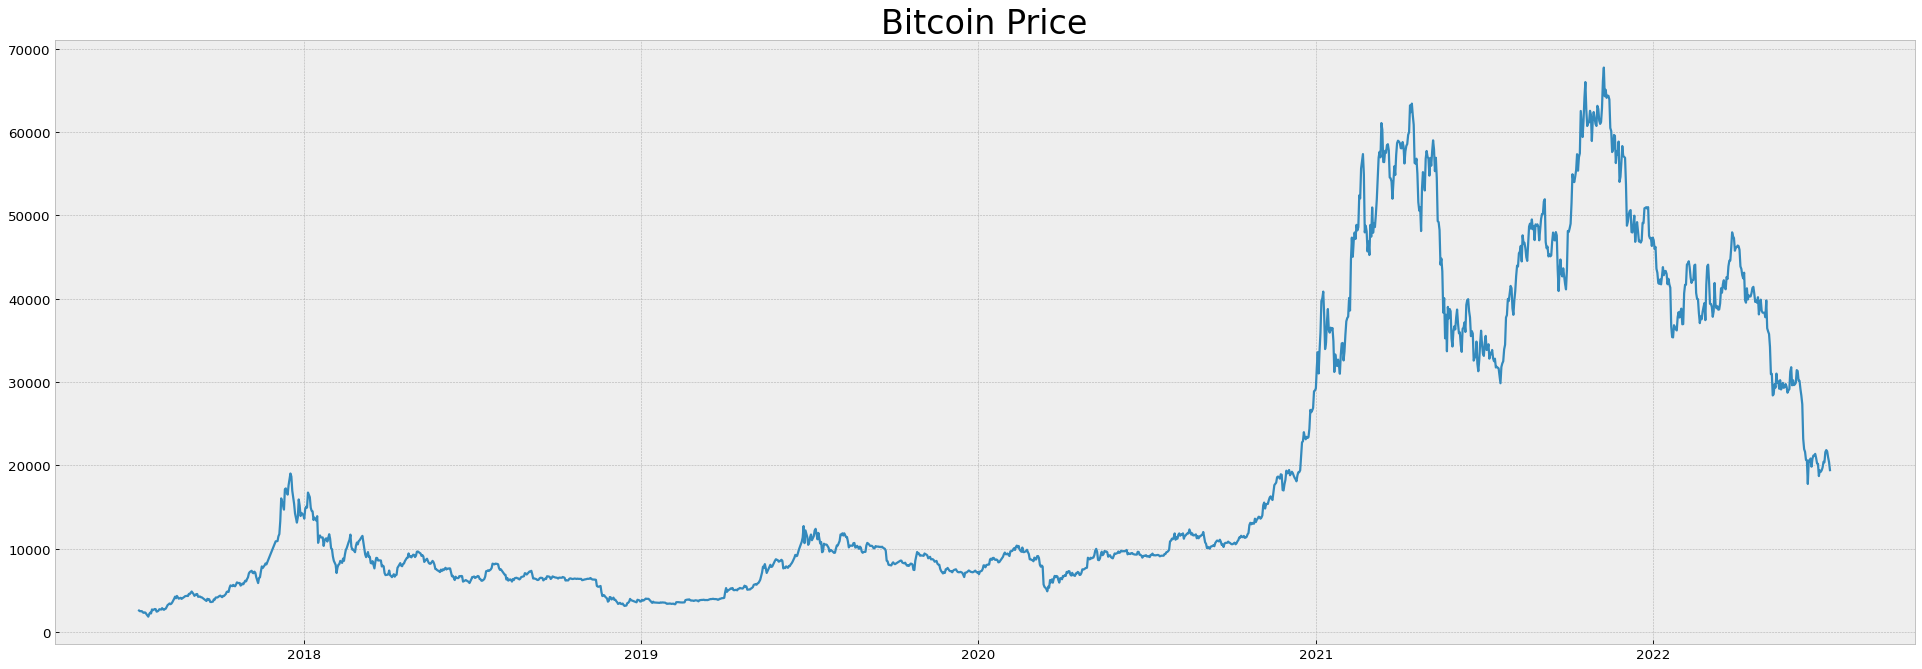

In [ ]:
plt.figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('Bitcoin Price', fontsize=30)

plt.plot(bf.XBTUSD)

In [ ]:
import seaborn as sns
num= bf.columns
corr_df=train[num]  #New dataframe to calculate correlation between numeric features
cor= corr_df.corr(method='pearson')

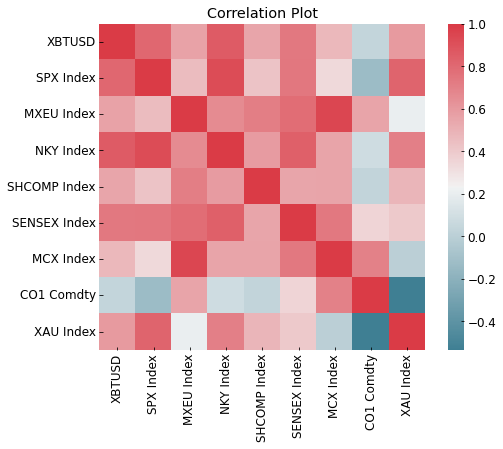

In [ ]:
fig, ax =plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

In [ ]:
#Decomposing our time series
# 1.Automatic time series decomposition

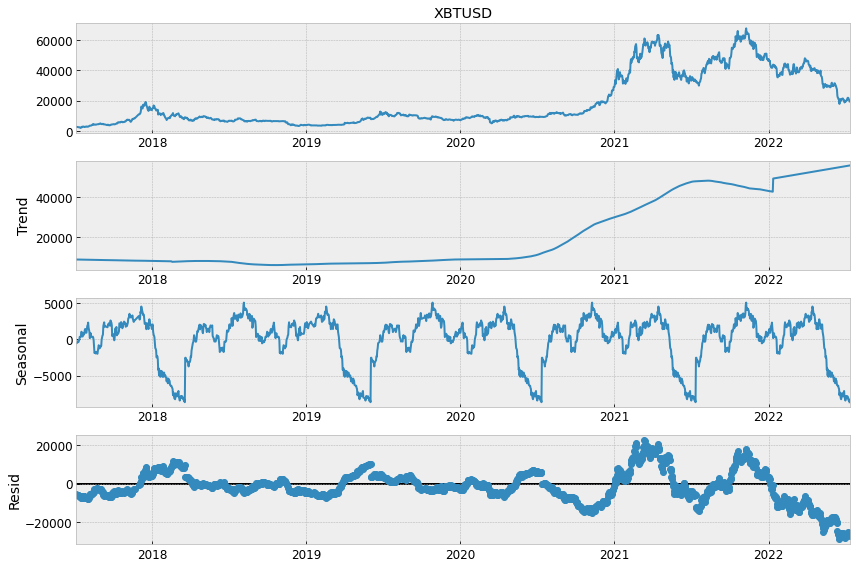

In [ ]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(bf.XBTUSD, model='additive', extrapolate_trend='freq', period=365) # additive seasonal index
fig = decomposition.plot()
plt.show()

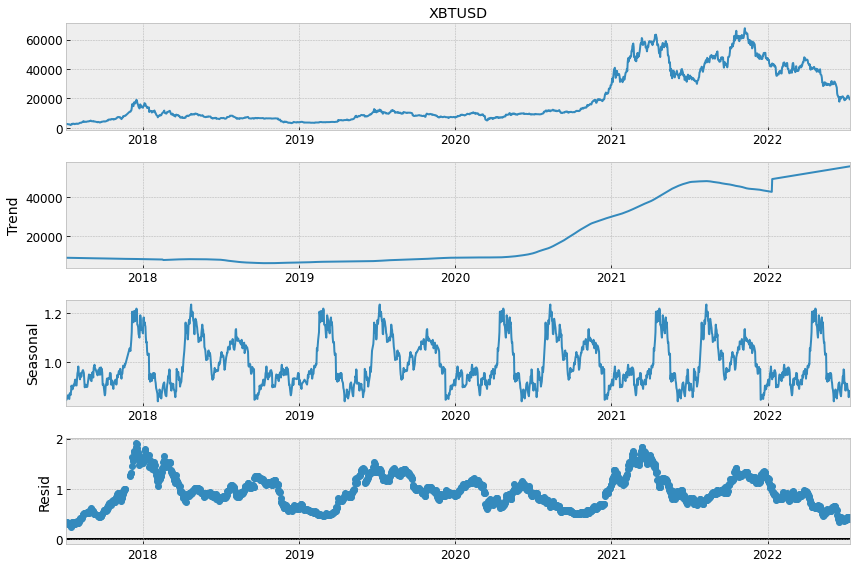

In [ ]:
decomposition = sm.tsa.seasonal_decompose(bf.XBTUSD, model='multiplicative', extrapolate_trend='freq', period=365) # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

In [ ]:
#Now we will try some methods to check for trend in our series:

# 1.Automatic decomposing
# 2.Moving average
# 3.Fit a linear regression model to identify trend

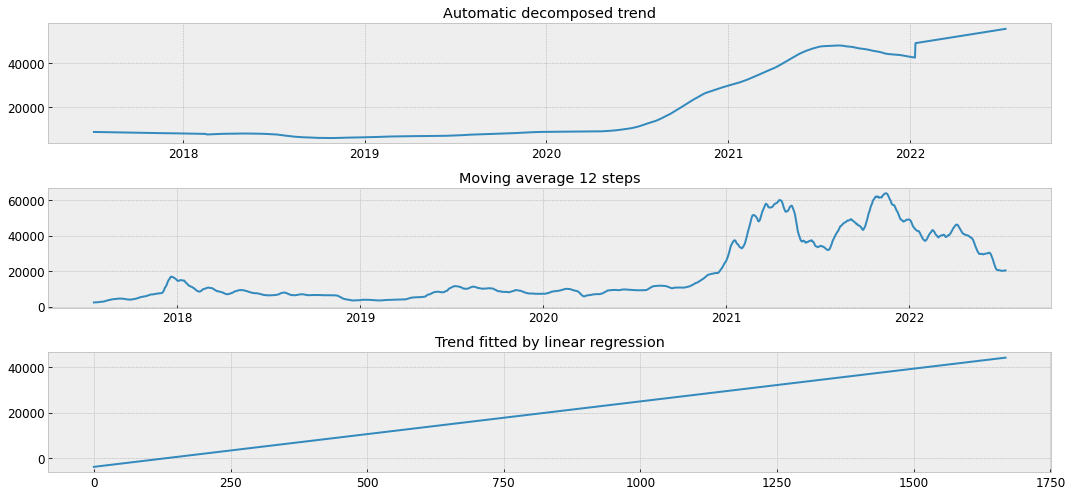

In [ ]:
fig = plt.figure(figsize=(15, 7))
layout = (3, 2)
pm_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
mv_ax = plt.subplot2grid(layout, (1, 0), colspan=2)
fit_ax = plt.subplot2grid(layout, (2, 0), colspan=2)

pm_ax.plot(decomposition.trend)
pm_ax.set_title("Automatic decomposed trend")

mm = bf.XBTUSD.rolling(12).mean()
mv_ax.plot(mm)
mv_ax.set_title("Moving average 12 steps")


X = [i for i in range(0, len(bf.XBTUSD))]
X = np.reshape(X, (len(X), 1))
y = bf.XBTUSD.values
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
fit_ax.plot(trend)
fit_ax.set_title("Trend fitted by linear regression")

plt.tight_layout()

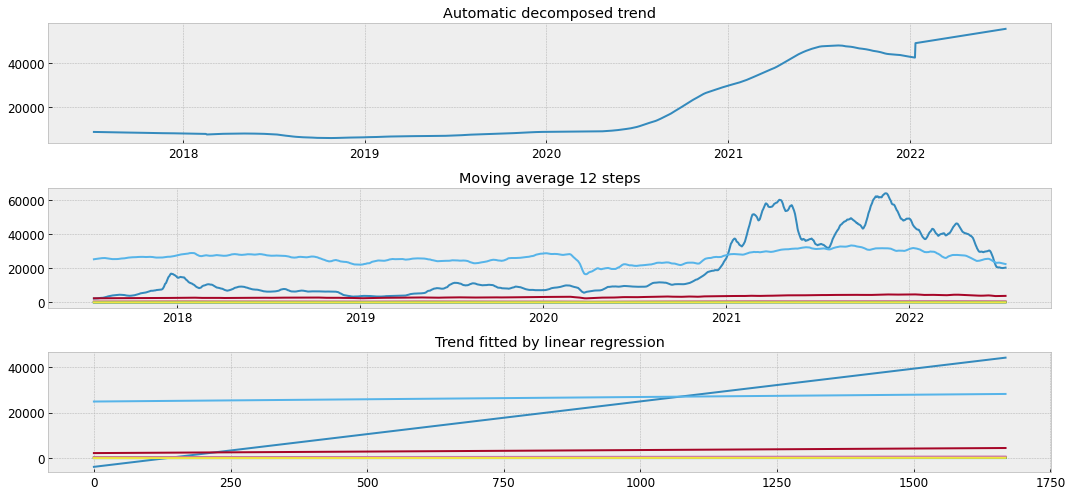

In [ ]:
fig = plt.figure(figsize=(15, 7))
layout = (3, 2)
pm_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
mv_ax = plt.subplot2grid(layout, (1, 0), colspan=2)
fit_ax = plt.subplot2grid(layout, (2, 0), colspan=2)

pm_ax.plot(decomposition.trend)
pm_ax.set_title("Automatic decomposed trend")

mm = bf.rolling(12).mean()
mv_ax.plot(mm)
mv_ax.set_title("Moving average 12 steps")


X = [i for i in range(0, len(bf.XBTUSD))]
X = np.reshape(X, (len(X), 1))
y = bf.values
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
fit_ax.plot(trend)
fit_ax.set_title("Trend fitted by linear regression")

plt.tight_layout()

In [ ]:
# Seasonality

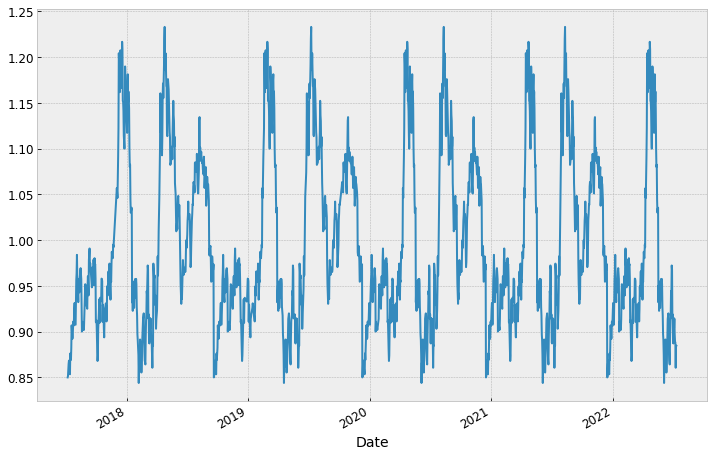

In [ ]:
result=seasonal_decompose(bf['XBTUSD'], model='multiplicable', extrapolate_trend='freq', period=365)
result.seasonal.plot()

In [ ]:
#result1=seasonal_decompose(bf, model='multiplicable', extrapolate_trend='freq', period=365)
#result1.seasonal.plot()

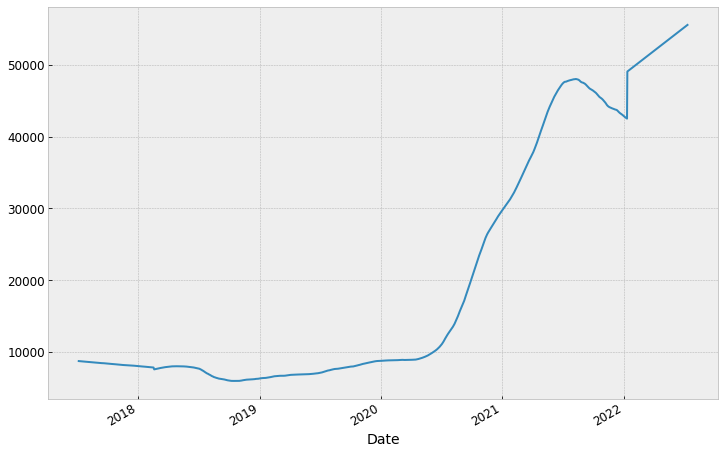

In [ ]:
result.trend.plot()

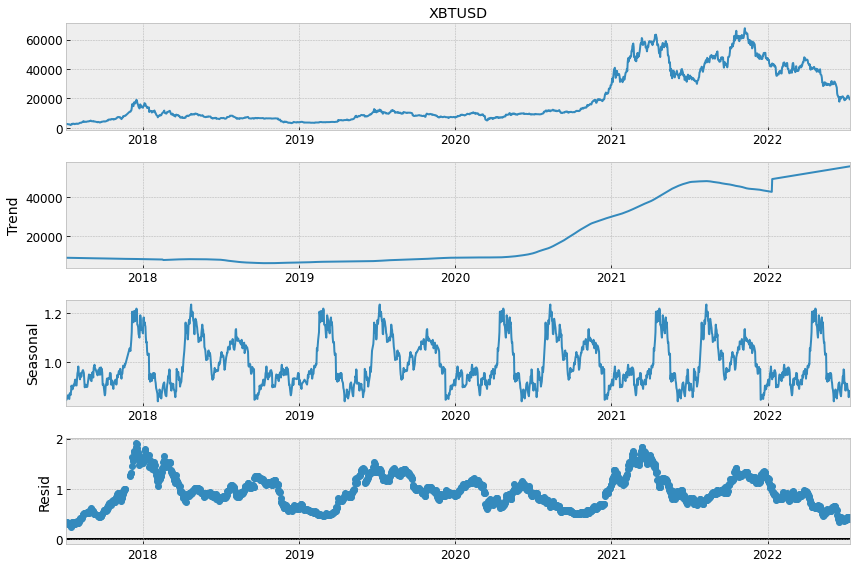

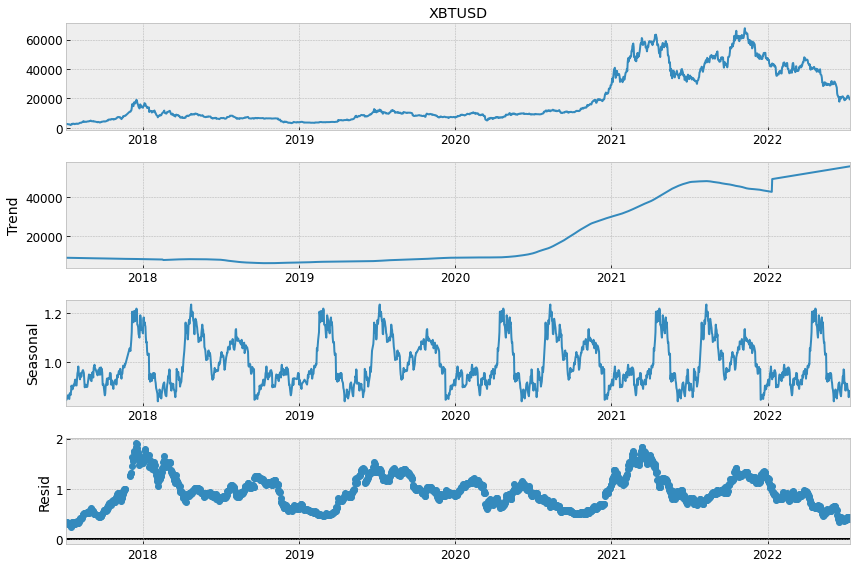

In [ ]:
result.plot()

In [ ]:
# INTERPRETATION


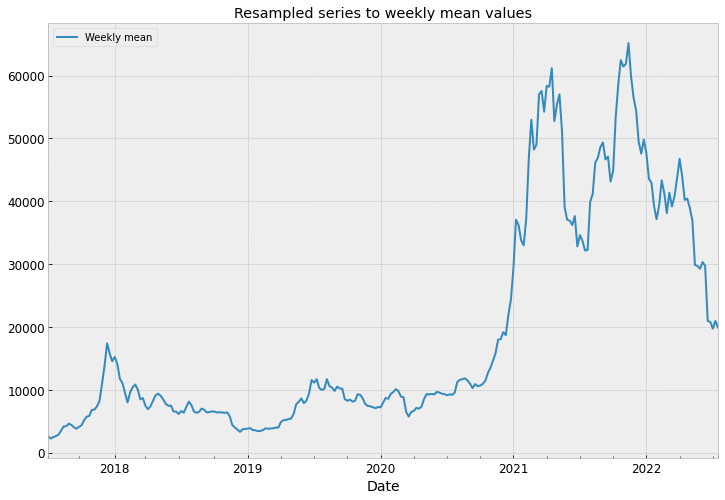

In [ ]:
# Looking for weekly seasonality
resample = bf.resample('W')
weekly_mean = resample.mean()
weekly_mean.XBTUSD.plot(label='Weekly mean')
plt.title("Resampled series to weekly mean values")
plt.legend()

In [ ]:
# Manual methods to find seasonalities


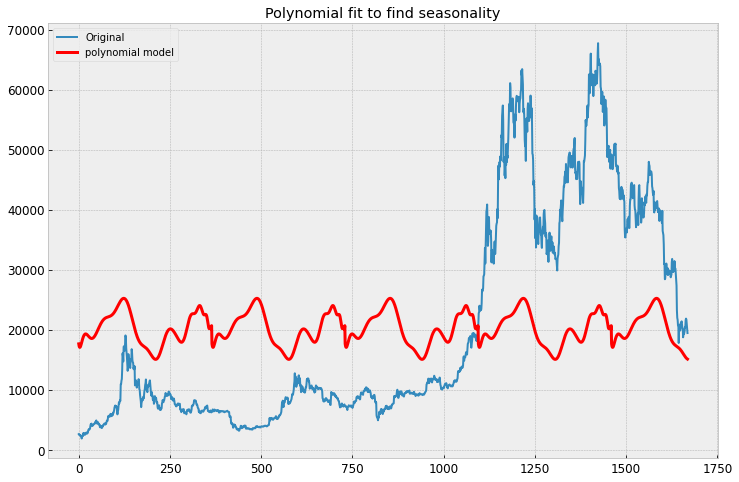

In [ ]:
# Fix xticks to show dates
# fit polynomial: x^2*b1 + x*b2 + ... + bn
series = bf.XBTUSD.values
X = [i % 365 for i in range(0, len(series))]
y = series
degree = 100
coef = np.polyfit(X, y, degree)
# create curve
curve = list()
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value += X[i]**(degree-d) * coef[d]
    curve.append(value)
# plot curve over original data
plt.plot(series, label='Original')
plt.plot(curve, color='red', linewidth=3, label='polynomial model')
plt.legend()
plt.title("Polynomial fit to find seasonality")
plt.show()

In [ ]:
# Noise

Text(0.5, 1.0, 'Mean over time')

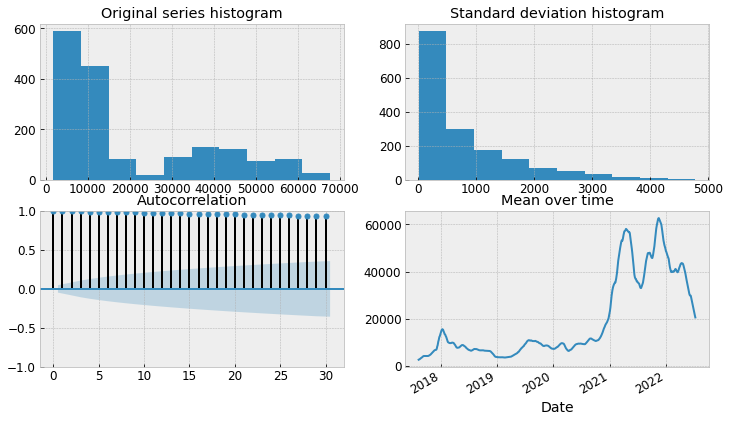

In [ ]:
fig = plt.figure(figsize=(12, 7))
layout = (2, 2)
hist_ax = plt.subplot2grid(layout, (0, 0))
ac_ax = plt.subplot2grid(layout, (1, 0))
hist_std_ax = plt.subplot2grid(layout, (0, 1))
mean_ax = plt.subplot2grid(layout, (1, 1))

bf.XBTUSD.hist(ax=hist_ax)
hist_ax.set_title("Original series histogram")

plot_acf(series, lags=30, ax=ac_ax)
ac_ax.set_title("Autocorrelation")

mm = bf.XBTUSD.rolling(7).std()
mm.hist(ax=hist_std_ax)
hist_std_ax.set_title("Standard deviation histogram")

mm = bf.XBTUSD.rolling(30).mean()
mm.plot(ax=mean_ax)
mean_ax.set_title("Mean over time")

In [ ]:
# Check for sationarity
# Autocorrelation and Partial autocorrelation plots

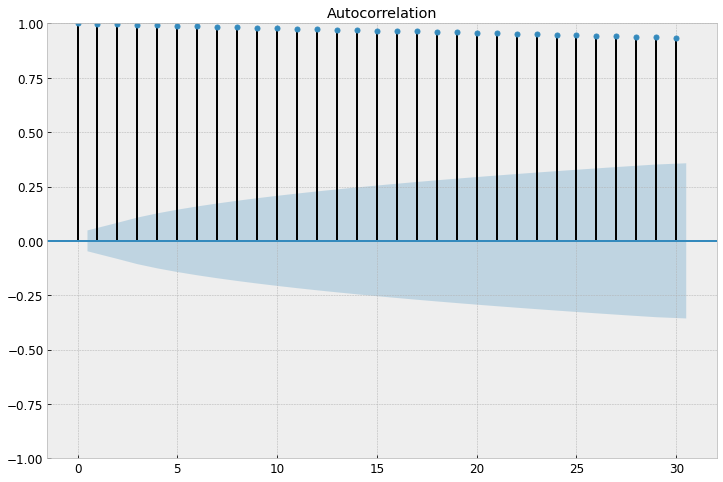

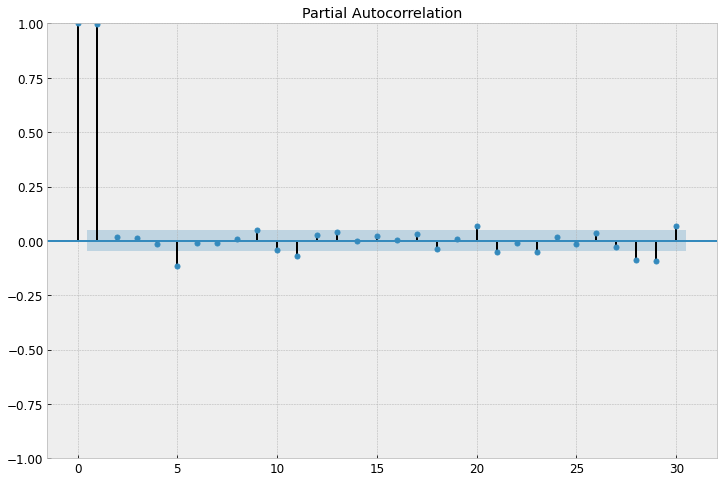

In [ ]:
plot_acf(series, lags=30)
plot_pacf(series, lags=30)
plt.show()

In [ ]:
# Rolling means and standard deviation of our series


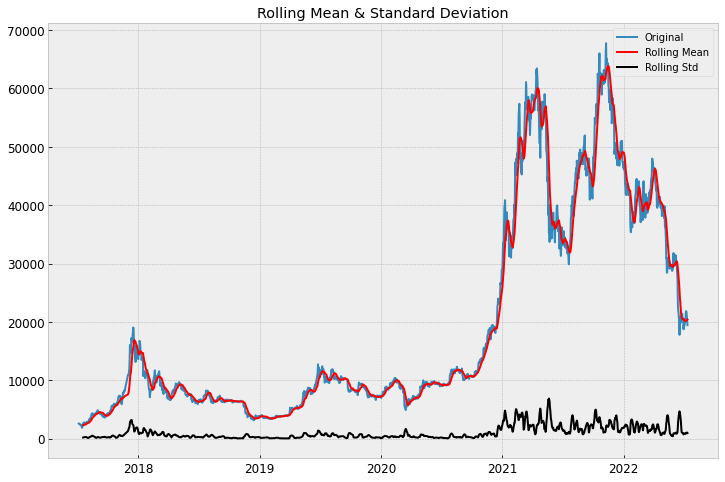

In [ ]:
# Determing rolling statistics
rolmean = bf.XBTUSD.rolling(window=12).mean()
rolstd = bf.XBTUSD.rolling(window=12).std()

# Plot rolling statistics:
orig = plt.plot(bf.XBTUSD, label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:
# Augmented Dickey-Fuller test


In [ ]:
X = bf.XBTUSD.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.476301
p-value: 0.545201
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


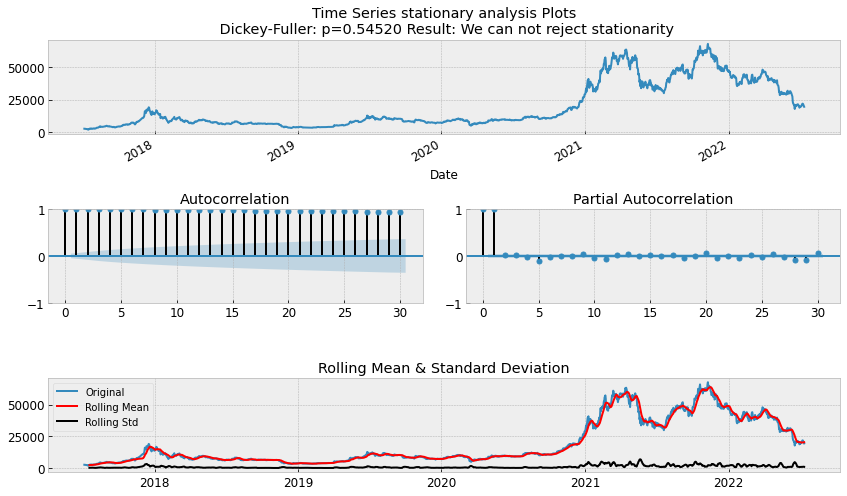

In [ ]:
def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=(12, 7))
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        mean_std_ax = plt.subplot2grid(layout, (2, 0), colspan=2)
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        hypothesis_result = "We reject stationarity" if p_value <= 0.05 else "We can not reject stationarity"
        ts_ax.set_title(
            'Time Series stationary analysis Plots\n Dickey-Fuller: p={0:.5f} Result: {1}'.format(p_value, hypothesis_result))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

        rolmean = bf.XBTUSD.rolling(window=12).mean()
        rolstd = bf.XBTUSD.rolling(window=12).std()

        # Plot rolling statistics:
        orig = plt.plot(bf.XBTUSD, label='Original')
        mean = plt.plot(rolmean, color='red', label='Rolling Mean')
        std = plt.plot(rolstd, color='black', label='Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation')


tsplot(bf.XBTUSD, lags=30)

In [ ]:
# Making Time Series Stationary


Text(0.5, 1.0, 'Original vs Windowed mean vs Windowed std')

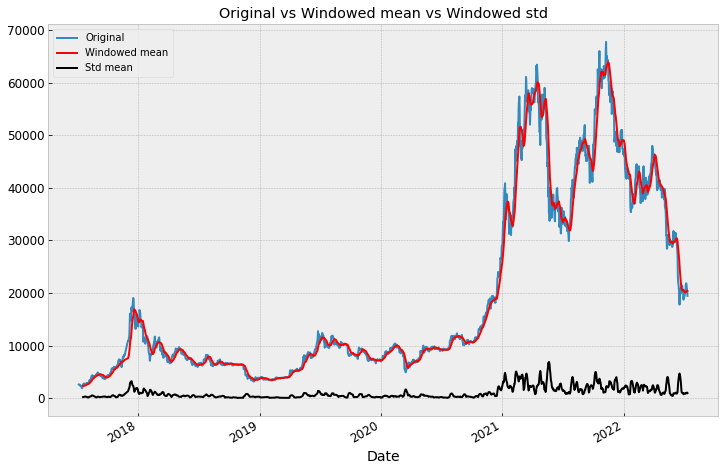

In [ ]:
bf.XBTUSD.plot(label='Original')
bf.XBTUSD.rolling(window=12).mean().plot(
    color='red', label='Windowed mean')
bf.XBTUSD.rolling(window=12).std().plot(
    color='black', label='Std mean')
plt.legend()
plt.title('Original vs Windowed mean vs Windowed std')

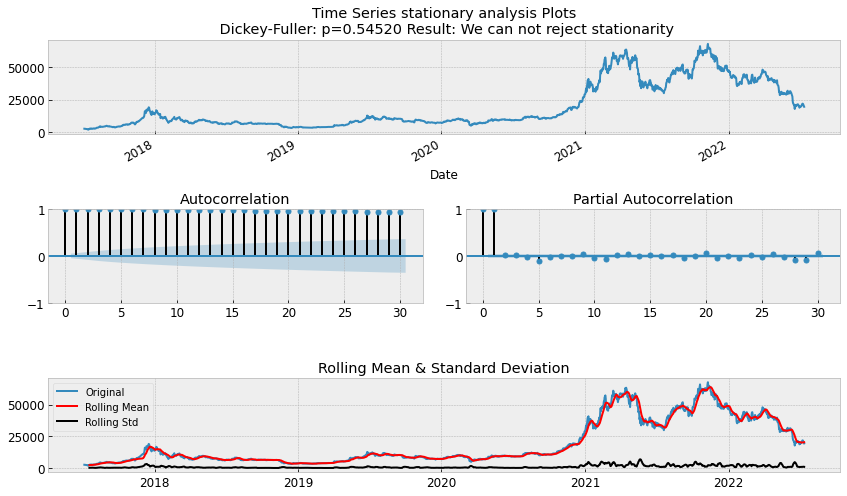

In [ ]:
tsplot(bf.XBTUSD, lags=30)


In [ ]:
def difference(dataset, interval=1, order=1):
    for u in range(order):
        diff = list()
        for i in range(interval, len(dataset)):
            value = dataset[i] - dataset[i - interval]
            diff.append(value)
        dataset = diff
    return diff

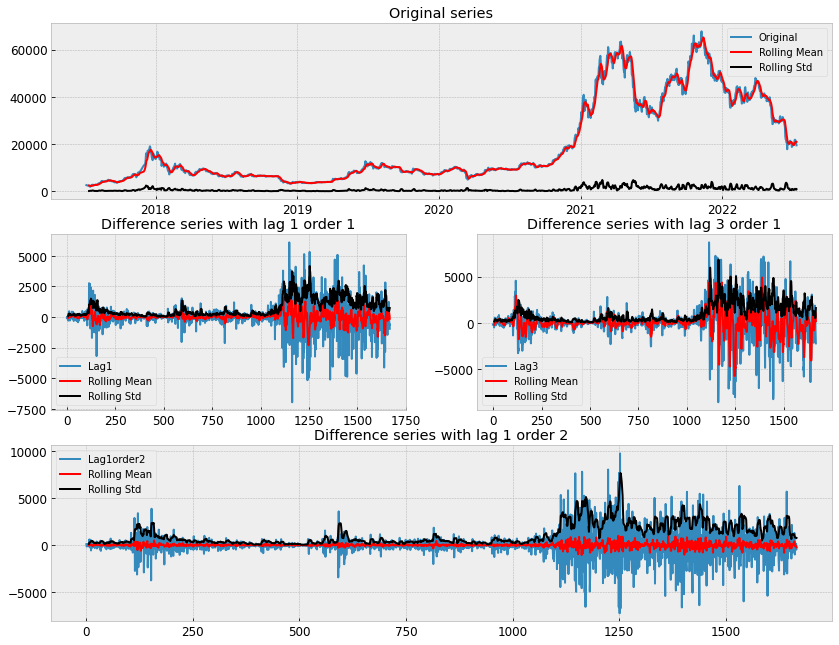

In [ ]:
lag1series = pd.Series(difference(bf.XBTUSD, interval=1, order=1))
lag3series = pd.Series(difference(bf.XBTUSD, interval=3, order=1))
lag1order2series = pd.Series(difference(
    bf.XBTUSD, interval=1, order=2))

fig = plt.figure(figsize=(14, 11))
layout = (3, 2)
original = plt.subplot2grid(layout, (0, 0), colspan=2)
lag1 = plt.subplot2grid(layout, (1, 0))
lag3 = plt.subplot2grid(layout, (1, 1))
lag1order2 = plt.subplot2grid(layout, (2, 0), colspan=2)

original.set_title('Original series')
original.plot(bf.XBTUSD, label='Original')
original.plot(bf.XBTUSD.rolling(
    7).mean(), color='red', label='Rolling Mean')
original.plot(bf.XBTUSD.rolling(7).std(),
              color='black', label='Rolling Std')
original.legend(loc='best')

lag1.set_title('Difference series with lag 1 order 1')
lag1.plot(lag1series, label="Lag1")
lag1.plot(lag1series.rolling(7).mean(), color='red', label='Rolling Mean')
lag1.plot(lag1series.rolling(7).std(), color='black', label='Rolling Std')
lag1.legend(loc='best')

lag3.set_title('Difference series with lag 3 order 1')
lag3.plot(lag3series, label="Lag3")
lag3.plot(lag3series.rolling(7).mean(), color='red', label='Rolling Mean')
lag3.plot(lag3series.rolling(7).std(), color='black', label='Rolling Std')
lag3.legend(loc='best')

lag1order2.set_title('Difference series with lag 1 order 2')
lag1order2.plot(lag1order2series, label="Lag1order2")
lag1order2.plot(lag1order2series.rolling(7).mean(),
                color='red', label='Rolling Mean')
lag1order2.plot(lag1order2series.rolling(7).std(),
                color='black', label='Rolling Std')
lag1order2.legend(loc='best')

In [ ]:
# Log scale transformation


Text(0.5, 1.0, 'Log scale transformation into original series')

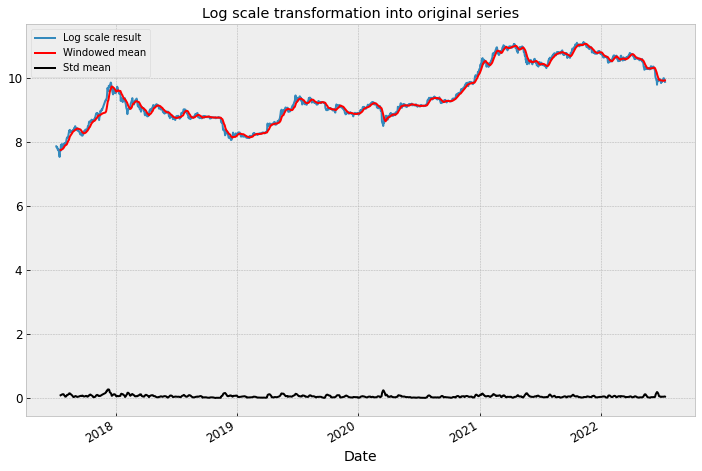

In [ ]:
ts_log = np.log(bf.XBTUSD)
ts_log.plot(label='Log scale result')
ts_log.rolling(window=12).mean().plot(color='red', label='Windowed mean')
ts_log.rolling(window=12).std().plot(color='black', label='Std mean')
plt.legend()
plt.title('Log scale transformation into original series')

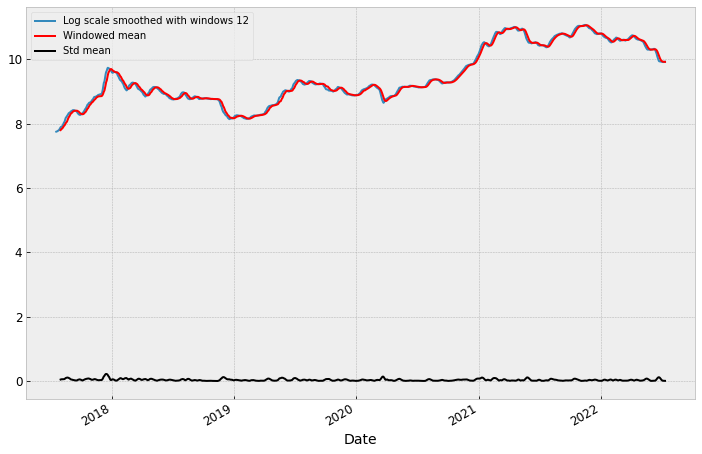

In [ ]:
avg = pd.Series(ts_log).rolling(12).mean()
plt.plot(avg, label='Log scale smoothed with windows 12')
avg.rolling(window=12).mean().plot(color='red', label='Windowed mean')
avg.rolling(window=12).std().plot(color='black', label='Std mean')
plt.legend()

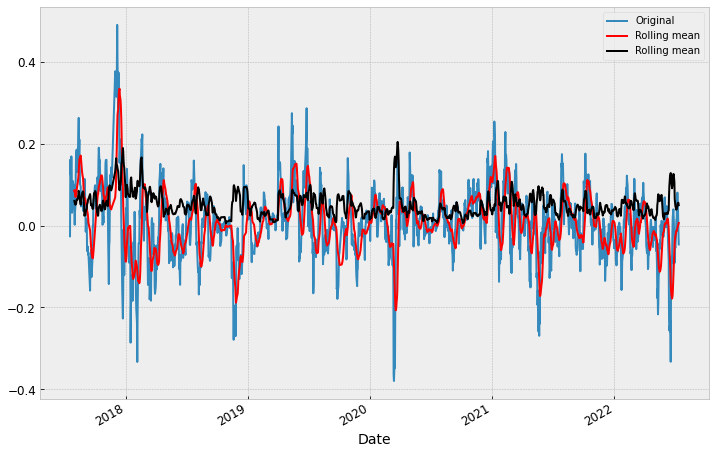

In [ ]:
ts_log_moving_avg_diff = ts_log - avg

ts_log_moving_avg_diff.plot(label='Original')
ts_log_moving_avg_diff.rolling(12).mean().plot(
    color='red', label="Rolling mean")
ts_log_moving_avg_diff.rolling(12).std().plot(
    color='black', label="Rolling mean")
plt.legend(loc='best')

In [ ]:
# We split our dataset to be able to evaluate our models

resultsDict = {}
predictionsDict = {}

split_date = '2021-11-01'
df_training = bf.loc[bf.index <= split_date]
df_test = bf.loc[bf.index > split_date]
print(f"{len(df_training)} days of training data \n {len(df_test)} days of testing data ")

1416 days of training data 
 253 days of testing data 


In [ ]:
train = bf[0:1416]
test = bf[1416:]

In [ ]:
import numpy as np
from sklearn.metrics import r2_score

EPSILON = 1e-10


def _error(actual: np.ndarray, predicted: np.ndarray):
    """Simple error"""
    return actual - predicted


def _percentage_error(actual: np.ndarray, predicted: np.ndarray):
    """
    Percentage error
    Note: result is NOT multiplied by 100
    """
    return _error(actual, predicted) / (actual + EPSILON)


def _naive_forecasting(actual: np.ndarray, seasonality: int = 1):
    """Naive forecasting method which just repeats previous samples"""
    return actual[:-seasonality]


def _relative_error(
    actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None
):
    """Relative Error"""
    if benchmark is None or isinstance(benchmark, int):
        # If no benchmark prediction provided - use naive forecasting
        if not isinstance(benchmark, int):
            seasonality = 1
        else:
            seasonality = benchmark
        return _error(actual[seasonality:], predicted[seasonality:]) / (
            _error(actual[seasonality:], _naive_forecasting(actual, seasonality))
            + EPSILON
        )

    return _error(actual, predicted) / (_error(actual, benchmark) + EPSILON)


def _bounded_relative_error(
    actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None
):
    """Bounded Relative Error"""
    if benchmark is None or isinstance(benchmark, int):
        # If no benchmark prediction provided - use naive forecasting
        if not isinstance(benchmark, int):
            seasonality = 1
        else:
            seasonality = benchmark

        abs_err = np.abs(_error(actual[seasonality:], predicted[seasonality:]))
        abs_err_bench = np.abs(
            _error(actual[seasonality:], _naive_forecasting(actual, seasonality))
        )
    else:
        abs_err = np.abs(_error(actual, predicted))
        abs_err_bench = np.abs(_error(actual, benchmark))

    return abs_err / (abs_err + abs_err_bench + EPSILON)


def _geometric_mean(a, axis=0, dtype=None):
    """Geometric mean"""
    if not isinstance(a, np.ndarray):  # if not an ndarray object attempt to convert it
        log_a = np.log(np.array(a, dtype=dtype))
    elif dtype:  # Must change the default dtype allowing array type
        if isinstance(a, np.ma.MaskedArray):
            log_a = np.log(np.ma.asarray(a, dtype=dtype))
        else:
            log_a = np.log(np.asarray(a, dtype=dtype))
    else:
        log_a = np.log(a)
    return np.exp(log_a.mean(axis=axis))


def mse(actual: np.ndarray, predicted: np.ndarray):
    """Mean Squared Error"""
    return np.mean(np.square(_error(actual, predicted)))


def rmse(actual: np.ndarray, predicted: np.ndarray):
    """Root Mean Squared Error"""
    return np.sqrt(mse(actual, predicted))


def nrmse(actual: np.ndarray, predicted: np.ndarray):
    """Normalized Root Mean Squared Error"""
    return rmse(actual, predicted) / (actual.max() - actual.min())


def me(actual: np.ndarray, predicted: np.ndarray):
    """Mean Error"""
    return np.mean(_error(actual, predicted))


def mae(actual: np.ndarray, predicted: np.ndarray):
    """Mean Absolute Error"""
    return np.mean(np.abs(_error(actual, predicted)))


mad = mae  # Mean Absolute Deviation (it is the same as MAE)


def gmae(actual: np.ndarray, predicted: np.ndarray):
    """Geometric Mean Absolute Error"""
    return _geometric_mean(np.abs(_error(actual, predicted)))


def mdae(actual: np.ndarray, predicted: np.ndarray):
    """Median Absolute Error"""
    return np.median(np.abs(_error(actual, predicted)))


def mpe(actual: np.ndarray, predicted: np.ndarray):
    """Mean Percentage Error"""
    return np.mean(_percentage_error(actual, predicted))


def mape(actual: np.ndarray, predicted: np.ndarray):
    """
    Mean Absolute Percentage Error
    Properties:
        + Easy to interpret
        + Scale independent
        - Biased, not symmetric
        - Undefined when actual[t] == 0
    Note: result is NOT multiplied by 100
    """
    return np.mean(np.abs(_percentage_error(actual, predicted)))


def mdape(actual: np.ndarray, predicted: np.ndarray):
    """
    Median Absolute Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.median(np.abs(_percentage_error(actual, predicted)))


def smape(actual: np.ndarray, predicted: np.ndarray):
    """
    Symmetric Mean Absolute Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.mean(
        2.0
        * np.abs(actual - predicted)
        / ((np.abs(actual) + np.abs(predicted)) + EPSILON)
    )


def smdape(actual: np.ndarray, predicted: np.ndarray):
    """
    Symmetric Median Absolute Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.median(
        2.0
        * np.abs(actual - predicted)
        / ((np.abs(actual) + np.abs(predicted)) + EPSILON)
    )


def maape(actual: np.ndarray, predicted: np.ndarray):
    """
    Mean Arctangent Absolute Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.mean(np.arctan(np.abs((actual - predicted) / (actual + EPSILON))))


def mase(actual: np.ndarray, predicted: np.ndarray, seasonality: int = 1):
    """
    Mean Absolute Scaled Error
    Baseline (benchmark) is computed with naive forecasting (shifted by @seasonality)
    """
    return mae(actual, predicted) / mae(
        actual[seasonality:], _naive_forecasting(actual, seasonality)
    )


def std_ae(actual: np.ndarray, predicted: np.ndarray):
    """Normalized Absolute Error"""
    __mae = mae(actual, predicted)
    return np.sqrt(
        np.sum(np.square(_error(actual, predicted) - __mae)) / (len(actual) - 1)
    )


def std_ape(actual: np.ndarray, predicted: np.ndarray):
    """Normalized Absolute Percentage Error"""
    __mape = mape(actual, predicted)
    return np.sqrt(
        np.sum(np.square(_percentage_error(actual, predicted) - __mape))
        / (len(actual) - 1)
    )


def rmspe(actual: np.ndarray, predicted: np.ndarray):
    """
    Root Mean Squared Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.sqrt(np.mean(np.square(_percentage_error(actual, predicted))))


def rmdspe(actual: np.ndarray, predicted: np.ndarray):
    """
    Root Median Squared Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.sqrt(np.median(np.square(_percentage_error(actual, predicted))))


def rmsse(actual: np.ndarray, predicted: np.ndarray, seasonality: int = 1):
    """Root Mean Squared Scaled Error"""
    q = np.abs(_error(actual, predicted)) / mae(
        actual[seasonality:], _naive_forecasting(actual, seasonality)
    )
    return np.sqrt(np.mean(np.square(q)))


def inrse(actual: np.ndarray, predicted: np.ndarray):
    """Integral Normalized Root Squared Error"""
    return np.sqrt(
        np.sum(np.square(_error(actual, predicted)))
        / np.sum(np.square(actual - np.mean(actual)))
    )


def rrse(actual: np.ndarray, predicted: np.ndarray):
    """Root Relative Squared Error"""
    return np.sqrt(
        np.sum(np.square(actual - predicted))
        / np.sum(np.square(actual - np.mean(actual)))
    )


def mre(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """Mean Relative Error"""
    return np.mean(_relative_error(actual, predicted, benchmark))


def rae(actual: np.ndarray, predicted: np.ndarray):
    """Relative Absolute Error (aka Approximation Error)"""
    return np.sum(np.abs(actual - predicted)) / (
        np.sum(np.abs(actual - np.mean(actual))) + EPSILON
    )


def mrae(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """Mean Relative Absolute Error"""
    return np.mean(np.abs(_relative_error(actual, predicted, benchmark)))


def mdrae(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """Median Relative Absolute Error"""
    return np.median(np.abs(_relative_error(actual, predicted, benchmark)))


def gmrae(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """Geometric Mean Relative Absolute Error"""
    return _geometric_mean(np.abs(_relative_error(actual, predicted, benchmark)))


def mbrae(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """Mean Bounded Relative Absolute Error"""
    return np.mean(_bounded_relative_error(actual, predicted, benchmark))


def umbrae(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """Unscaled Mean Bounded Relative Absolute Error"""
    __mbrae = mbrae(actual, predicted, benchmark)
    return __mbrae / (1 - __mbrae)


def mda(actual: np.ndarray, predicted: np.ndarray):
    """Mean Directional Accuracy"""
    return np.mean(
        (
            np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])
        ).astype(int)
    )


def bias(actual: np.ndarray, predicted: np.ndarray):
    """Mean forecast error(or Forecast Bias)"""
    return np.mean(actual - predicted)


METRICS = {
    "mse": mse,
    "rmse": rmse,
    "nrmse": nrmse,
    "me": me,
    "mae": mae,
    "mad": mad,
    "gmae": gmae,
    "mdae": mdae,
    "mpe": mpe,
    "mape": mape,
    "mdape": mdape,
    "smape": smape,
    "smdape": smdape,
    "maape": maape,
    "mase": mase,
    "std_ae": std_ae,
    "std_ape": std_ape,
    "rmspe": rmspe,
    "rmdspe": rmdspe,
    "rmsse": rmsse,
    "inrse": inrse,
    "rrse": rrse,
    "mre": mre,
    "rae": rae,
    "mrae": mrae,
    "mdrae": mdrae,
    "gmrae": gmrae,
    "mbrae": mbrae,
    "umbrae": umbrae,
    "mda": mda,
    "bias": bias,
    "r2": r2_score,
}


def evaluate(
    actual: np.ndarray, predicted: np.ndarray, metrics=( "nrmse", "mape", "mdape", "smape", "smdape", "maape", "mase", "std_ae", "std_ape", "rmspe", "rmdspe", "rmsse", "inrse", "rrse", "mre", "rae", "mrae", "mdrae", "gmrae", "mbrae", "umbrae", "mda", "bias", "r2", "mse", "rmse", "me", "mae", "mad", "gmae", "mdae")
):
    results = {}
    for name in metrics:
        try:
            results[name] = METRICS[name](actual, predicted)
        except Exception as err:
            results[name] = np.nan
            print("Unable to compute metric {0}: {1}".format(name, err))
    return results


def evaluate_all(actual: np.ndarray, predicted: np.ndarray):
    return evaluate(actual, predicted, metrics=set(METRICS.keys()))

In [ ]:
#BAR METRICS
import matplotlib.pyplot as plt
import pandas as pd


def bar_metrics(resultsDict):
    df = pd.DataFrame.from_dict(resultsDict)
    colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
    pallette = plt.cm.get_cmap("tab20c", len(df.columns))
    colors = [pallette(x) for x in range(len(df.columns))]
    color_dict = dict(zip(df.columns, colors))
    fig = plt.figure(figsize=(20, 15))

    # MAE plot
    fig.add_subplot(2, 2, 1)
    df.loc["mae"].sort_values().plot(
        kind="bar",
        colormap="Paired",
        color=[color_dict.get(x, "#333333") for x in df.loc["mae"].sort_values().index],
    )
    plt.legend()
    plt.title("MAE Metric, lower is better")
    fig.add_subplot(2, 2, 2)
    df.loc["rmse"].sort_values().plot(
        kind="bar",
        colormap="Paired",
        color=[
            color_dict.get(x, "#333333") for x in df.loc["rmse"].sort_values().index
        ],
    )
    plt.legend()
    plt.title("RMSE Metric, lower is better")
    fig.add_subplot(2, 2, 3)
    df.loc["mape"].sort_values().plot(
        kind="bar",
        colormap="Paired",
        color=[
            color_dict.get(x, "#333333") for x in df.loc["mape"].sort_values().index
        ],
    )
    plt.legend()
    plt.title("MAPE Metric, lower is better")
    fig.add_subplot(2, 2, 4)
    df.loc["r2"].sort_values(ascending=False).plot(
        kind="bar",
        colormap="Paired",
        color=[
            color_dict.get(x, "#333333")
            for x in df.loc["r2"].sort_values(ascending=False).index
        ],
    )
    plt.legend()
    plt.title("R2 Metric, higher is better")
    plt.tight_layout()
    #plt.savefig("results/metrics.png")
    plt.show()

In [ ]:
def evaluate(
    actual: np.ndarray, predicted: np.ndarray, metrics=("nrmse", "mape", "mdape", "smape", "smdape", "maape", "mase", "std_ae", "std_ape", "rmspe", "rmdspe", "rmsse", "inrse", "rrse", "mre", "rae", "mrae", "mdrae", "gmrae", "mbrae", "umbrae", "mda", "bias", "r2", "mse", "rmse", "me", "mae", "mad", "gmae", "mdae")
):
    results = {}
    for name in metrics:
        try:
            results[name] = METRICS[name](actual, predicted)
        except Exception as err:
            results[name] = np.nan
            print("Unable to compute metric {0}: {1}".format(name, err))
    return results



def evaluate_all(actual: np.ndarray, predicted: np.ndarray):
    return evaluate(actual, predicted, metrics=set(METRICS.keys()))

In [ ]:
# ADD time features to our model
def create_time_features(df, target=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['sin_day'] = np.sin(df['dayofyear'])
    df['cos_day'] = np.cos(df['dayofyear'])
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    X = df.drop(['date'], axis=1)
    if target:
        y = df[target]
        X = X.drop([target], axis=1)
        return X, y

    return X

In [ ]:
# Linear models
# 1.Bayesian regression


In [ ]:
# We split our dataset to be able to evaluate our models

resultsDict = {}
predictionsDict = {}

split_date = '2021-05-01'
df_training = bf.loc[bf.index <= split_date]
df_test = bf.loc[bf.index > split_date]
print(f"{len(df_training)} days of training data \n {len(df_test)} days of testing data ")

1232 days of training data 
 437 days of testing data 


In [ ]:
train = bf[0:1232]
test = bf[1232:]

In [ ]:
X_train_df, y_train = create_time_features(
    df_training, target='XBTUSD')
X_test_df, y_test = create_time_features(df_test, target='XBTUSD')
scaler = StandardScaler()
scaler.fit(X_train_df)  # No cheating, never scale on the training+test!
X_train = scaler.transform(X_train_df)
X_test = scaler.transform(X_test_df)

X_train_df = pd.DataFrame(X_train, columns=X_train_df.columns)
X_test_df = pd.DataFrame(X_test, columns=X_test_df.columns)

In [ ]:
reg = linear_model.BayesianRidge()
reg.fit(X_train, y_train)
yhat = reg.predict(X_test)
resultsDict['BayesianRidge'] = evaluate(df_test.XBTUSD, yhat)
predictionsDict['BayesianRidge'] = yhat

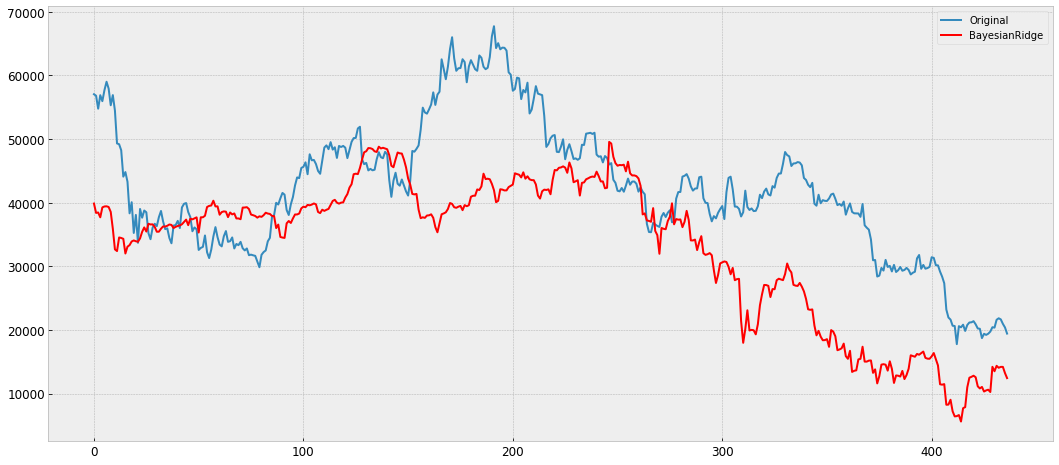

In [ ]:
plt.plot(df_test.XBTUSD.values, label='Original')
plt.plot(yhat, color='red', label='BayesianRidge')
plt.legend()

In [ ]:
resultsDict['BayesianRidge']

{'nrmse': 0.2550441389130652,
 'mape': 0.25989414996724053,
 'mdape': 0.2208689452651145,
 'smape': 0.3232707524217517,
 'smdape': 0.23705825137767159,
 'maape': 0.24643042420397118,
 'mase': inf,
 'std_ae': 9066.718665733106,
 'std_ape': 0.2329714271122288,
 'rmspe': 0.3178901013989407,
 'rmdspe': 0.2208689452651145,
 'rmsse': inf,
 'inrse': 1.197020253501436,
 'rrse': 1.197020253501436,
 'mre': 90580308000148.53,
 'rae': 1.2645693829694573,
 'mrae': 104891860959405.95,
 'mdrae': nan,
 'gmrae': nan,
 'mbrae': 0.9999999999999665,
 'umbrae': 29825163095167.848,
 'mda': nan,
 'bias': 9071.885697558528,
 'r2': -0.43285748729264206,
 'mse': 162286883.95244005,
 'rmse': 12739.186942361748,
 'me': 9071.885697558528,
 'mae': 10496.491083663099,
 'mad': 10496.491083663099,
 'gmae': 7190.917974533127,
 'mdae': 8531.797066265739}

In [ ]:
reg = linear_model.BayesianRidge()
bay_params = {'alpha_init':[1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.9],
              'lambda_init': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-9]}
a = GridSearchCV(estimator=linear_model.BayesianRidge(), param_grid = bay_params, cv = 5, n_jobs=-1)
a.fit(X_train, y_train)
yhat = a.predict(X_test)
resultsDict['BayesianRidge Grid Search'] = evaluate(df_test.XBTUSD, yhat)
predictionsDict['BayesianRidge Grid Search'] = yhat

In [ ]:
resultsDict['BayesianRidge Grid Search']

{'nrmse': 0.38057021871729524,
 'mape': 0.42262816844374806,
 'mdape': 0.3526704055991671,
 'smape': 0.6183404499903828,
 'smdape': 0.428172245308858,
 'maape': 0.3680633079445917,
 'mase': inf,
 'std_ae': 11824.102196733173,
 'std_ape': 0.37471372629796346,
 'rmspe': 0.5377134119427152,
 'rmdspe': 0.3526704055991671,
 'rmsse': inf,
 'inrse': 1.7861624330028354,
 'rrse': 1.7861624330028354,
 'mre': 149387663714237.66,
 'rae': 1.9405123252876637,
 'mrae': 161108050143460.66,
 'mdrae': nan,
 'gmrae': nan,
 'mbrae': 0.9999999999999543,
 'umbrae': 21862134113448.008,
 'mda': nan,
 'bias': 14940.44499899235,
 'r2': -2.1903762370706086,
 'mse': 361345229.893303,
 'rmse': 19009.082826199243,
 'me': 14940.44499899235,
 'mae': 16107.11962066558,
 'mad': 16107.11962066558,
 'gmae': 10745.928779228181,
 'mdae': 16815.346578566205}

In [ ]:
predictionsDict['BayesianRidge Grid Search']

array([44784.31478806, 43286.5058536 , 43046.47080992, 42367.37621844,
       44952.33238091, 45274.21708511, 45208.45425156, 44976.84947098,
       43966.11362161, 40552.10472093, 36278.65685716, 35950.02718439,
       38233.39459195, 38029.64113672, 37814.5164032 , 35267.61580391,
       37007.47334882, 37352.03368236, 38282.96938855, 38378.29854022,
       38141.59142558, 38053.58059331, 38369.18016512, 39179.16968339,
       39734.04074356, 38454.65752619, 40197.98684733, 40049.58267814,
       40136.75471222, 39551.02875103, 36517.37775892, 36481.89008358,
       36774.09182298, 37080.94006992, 37098.63313942, 37322.83278798,
       37646.9635965 , 37352.64165363, 36514.6761226 , 36799.60756852,
       36887.56122993, 37067.39351935, 37323.02115649, 37696.15385143,
       38176.36364491, 37080.52556308, 37835.0522444 , 37627.3602767 ,
       37885.56957427, 38051.5568598 , 34410.21292494, 37326.06385898,
       37048.26792857, 37382.35467736, 38699.99521063, 38914.24249454,
      

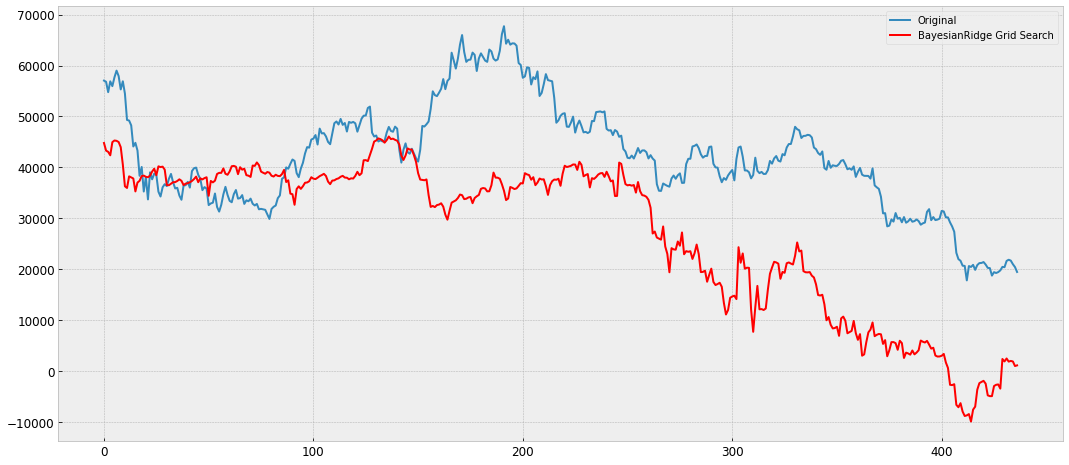

In [ ]:
plt.plot(df_test.XBTUSD.values, label='Original')
plt.plot(yhat, color='red', label='BayesianRidge Grid Search')
plt.legend()

In [ ]:
increase = 1 - (resultsDict['BayesianRidge Grid Search']
                ['r2']/resultsDict['BayesianRidge']['maape'])
print(
    f"Grid search Tunned BayesianRidge is {increase*100}% better than the BayesianRidge with default parameters")

Grid search Tunned BayesianRidge is 988.8416453229113% better than the BayesianRidge with default parameters


In [ ]:
cv_results = pd.DataFrame(a.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha_init,param_lambda_init,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003618,0.000845,0.000646,0.000116,1,0.1,"{'alpha_init': 1, 'lambda_init': 0.1}",-29.458228,-5.664636,-10.03331,-84.200980,-0.488334,-25.969098,30.720078,48
1,0.006177,0.003076,0.000696,0.000107,1,0.01,"{'alpha_init': 1, 'lambda_init': 0.01}",-29.458228,-5.664636,-10.03331,-48.836675,-0.488334,-18.896237,17.891132,37
2,0.003543,0.000300,0.000647,0.000020,1,0.001,"{'alpha_init': 1, 'lambda_init': 0.001}",-29.458228,-5.664636,-10.03331,-48.836675,-0.488334,-18.896237,17.891132,35
3,0.004305,0.001710,0.000613,0.000035,1,0.0001,"{'alpha_init': 1, 'lambda_init': 0.0001}",-29.458228,-5.664636,-10.03331,-48.836675,-0.488334,-18.896237,17.891132,28
4,0.004889,0.002782,0.000661,0.000058,1,0.00001,"{'alpha_init': 1, 'lambda_init': 1e-05}",-29.458228,-5.664636,-10.03331,-48.836675,-0.488334,-18.896237,17.891132,21


In [ ]:
y_pred = a.predict(X_test)


In [ ]:
results = pd.DataFrame(zip(y_test, y_pred, y_test - y_pred), columns = ['y_test', 'y_pred', 'error'])
results.head(10)

,y_test,y_pred,error
0,57042.24,44784.314788,12257.925212
1,56811.66,43286.505854,13525.154146
2,54770.39,43046.470810,11723.919190
3,56895.44,42367.376218,14528.063782
4,55955.47,44952.332381,11003.137619
5,57684.39,45274.217085,12410.172915
6,59004.37,45208.454252,13795.915748
7,57931.38,44976.849471,12954.530529
8,55308.81,43966.113622,11342.696378
9,56911.32,40552.104721,16359.215279


In [ ]:
# 2.Lasso

In [ ]:

resultsDict = {}
predictionsDict = {}

split_date = '2022-06-01'
df_training = bf.loc[bf.index <= split_date]
df_test = bf.loc[bf.index > split_date]
print(f"{len(df_training)} days of training data \n {len(df_test)} days of testing data ")

1628 days of training data 
 41 days of testing data 


In [ ]:
train = bf[0:1628]
test = bf[1628:]

In [ ]:
X_train_df, y_train = create_time_features(
    df_training, target='XBTUSD')
X_test_df, y_test = create_time_features(df_test, target='XBTUSD')
scaler = StandardScaler()
scaler.fit(X_train_df)  # No cheating, never scale on the training+test!
X_train = scaler.transform(X_train_df)
X_test = scaler.transform(X_test_df)

X_train_df = pd.DataFrame(X_train, columns=X_train_df.columns)
X_test_df = pd.DataFrame(X_test, columns=X_test_df.columns)

In [ ]:
reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train, y_train)
yhat = reg.predict(X_test)
resultsDict['Lasso'] = evaluate(df_test.XBTUSD, yhat)
predictionsDict['Lasso'] = yhat

Unable to compute metric mda: ('Lengths must match to compare', (41,), (40,))


In [ ]:
resultsDict['Lasso']

{'nrmse': 0.3958087890921181,
 'mape': 0.21324513218390584,
 'mdape': 0.23509659063205682,
 'smape': 0.1837646899459169,
 'smdape': 0.2103681707693671,
 'maape': 0.20550675622899267,
 'mase': inf,
 'std_ae': 9486.981771253031,
 'std_ape': 0.45865218462074325,
 'rmspe': 0.26383473397686935,
 'rmdspe': 0.23509659063205682,
 'rmsse': inf,
 'inrse': 1.2795645832361568,
 'rrse': 1.2795645832361568,
 'mre': -43603304994619.16,
 'rae': 1.2240454710577269,
 'mrae': 44180433535200.7,
 'mdrae': nan,
 'gmrae': nan,
 'mbrae': 0.9999999999998778,
 'umbrae': 8180925753623.879,
 'mda': nan,
 'bias': -4383.16668374891,
 'r2': -0.63728552267232,
 'mse': 29205666.841202457,
 'rmse': 5404.2267570118165,
 'me': -4383.16668374891,
 'mae': 4438.064276633497,
 'mad': 4438.064276633497,
 'gmae': 2770.426682713038,
 'mdae': 4181.214023084311}

In [ ]:
y_pred = reg.predict(X_test)


In [ ]:
results = pd.DataFrame(zip(y_test, y_pred, y_test - y_pred), columns = ['y_test', 'y_pred', 'error'])
results.head(10)

,y_test,y_pred,error
0,30225.18,32633.737927,-2408.557927
1,29640.50,31253.118372,-1612.618372
2,29733.76,31085.962086,-1352.202086
3,29925.66,30988.919070,-1063.259070
4,31438.72,31294.271118,144.448882
5,31330.81,32247.266062,-916.456062
6,30179.77,31339.211647,-1159.441647
7,30161.34,30212.616680,-51.276680
8,29177.39,28353.144013,824.245987
9,28380.38,28223.674214,156.705786


In [ ]:
resultsDict['Lasso']

{'nrmse': 0.20497932878482827,
 'mape': 0.14107942313485508,
 'mdape': 0.12293389303055403,
 'smape': 0.136300047859266,
 'smdape': 0.12982526016320575,
 'maape': 0.13867861000980583,
 'mase': inf,
 'std_ae': 8441.618678419953,
 'std_ape': 0.23927334410518314,
 'rmspe': 0.17272587541111398,
 'rmdspe': 0.12293396805246731,
 'rmsse': inf,
 'inrse': 0.755431487404311,
 'rrse': 0.755431487404311,
 'mre': -8134590851402.276,
 'rae': 0.7066078993756519,
 'mrae': 49117372526447.62,
 'mdrae': nan,
 'gmrae': nan,
 'mbrae': 0.9999999999975617,
 'umbrae': 410126548343.45825,
 'mda': nan,
 'bias': -859.7981543372716,
 'r2': 0.42932326783811037,
 'mse': 38276276.98053412,
 'rmse': 6186.782441668215,
 'me': -859.7981543372716,
 'mae': 4915.3859242636345,
 'mad': 4915.3859242636345,
 'gmae': 3258.7984045016215,
 'mdae': 3919.3603560155716}

In [ ]:
from sklearn.linear_model import ElasticNet


In [ ]:

# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

# grid search
# lasso model
model = ElasticNet()
model_cv_en = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv_en.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [ ]:
yhat = model_cv_en.predict(X_test)
resultsDict['Lasso Grid Search'] = evaluate(df_test.XBTUSD, yhat)
predictionsDict['Lasso Grid Search'] = yhat

Unable to compute metric mda: ('Lengths must match to compare', (11,), (10,))


In [ ]:
resultsDict['Lasso Grid Search']

{'nrmse': 0.20436178485218404,
 'mape': 0.14053593759081284,
 'mdape': 0.11596615235914845,
 'smape': 0.13411480842604576,
 'smdape': 0.12066464793218427,
 'maape': 0.1380074592499008,
 'mase': inf,
 'std_ae': 8592.423922151862,
 'std_ape': 0.24706986511836967,
 'rmspe': 0.17439332984252537,
 'rmdspe': 0.11596619468608399,
 'rmsse': inf,
 'inrse': 0.7531555889791354,
 'rrse': 0.7531555889791354,
 'mre': -11405658558410.729,
 'rae': 0.7017338882563826,
 'mrae': 48758263921096.24,
 'mdrae': nan,
 'gmrae': nan,
 'mbrae': 0.999999999999935,
 'umbrae': 15396921802975.055,
 'mda': nan,
 'bias': -1185.1292035691501,
 'r2': 0.43275665878949177,
 'mse': 38045993.501935504,
 'rmse': 6168.1434404474985,
 'me': -1185.1292035691501,
 'mae': 4881.480775918238,
 'mad': 4881.480775918238,
 'gmae': 3351.622440846019,
 'mdae': 3932.1178752768974}

In [ ]:
predictionsDict['Lasso Grid Search']

array([51717.11561054, 60435.08549013, 59829.03678281, 56957.67291751,
       56744.35256476, 56212.35105829, 56356.85774929, 56335.57124582,
       57161.32093965, 56792.97517238, 57638.45644634, 55314.34278369,
       55750.15189586, 55783.53976384, 55634.83714098, 55054.272453  ,
       53371.52519855, 49427.06025675, 48458.88137632, 46983.9055119 ,
       46880.91434095, 46669.1595014 , 48916.17723603, 45488.09224353,
       44678.93215752, 42302.7402384 , 46744.04853172, 46546.54325401,
       46367.13411723, 48331.000595  , 49037.41516278, 50951.11759461,
       47239.37373101, 48562.4861855 , 48358.85115041, 48291.26522681,
       46908.51455283, 48106.5863174 , 49880.64134744, 47714.51280704,
       44212.63624526, 44094.27284111, 44162.94875974, 43149.92838906,
       45246.19897137, 45787.77765291, 42639.21172714, 42525.88826174,
       42542.22756457, 42704.53649009, 43056.35120281, 40740.99176179,
       38398.62798249, 40307.24528597, 42156.63990247, 42290.81292329,
      

In [ ]:
cv_results_en = pd.DataFrame(model_cv_en.cv_results_)
cv_results_en.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.022735,0.002453,0.000902,0.000036,0.001,{'alpha': 0.001},0.861575,0.876446,0.882925,0.873766,...,0.875883,0.008209,1,0.882249,0.878723,0.877312,0.879286,0.876503,0.878815,0.001981
1,0.023697,0.005203,0.000951,0.000180,0.01,{'alpha': 0.01},0.860100,0.871598,0.880986,0.871994,...,0.873307,0.007889,2,0.879529,0.876327,0.874635,0.876629,0.873770,0.876178,0.001982
2,0.002683,0.000882,0.000648,0.000046,1.0,{'alpha': 1.0},0.841466,0.842371,0.857397,0.853671,...,0.850119,0.006804,3,0.853688,0.853004,0.849872,0.851338,0.849628,0.851506,0.001627
3,0.001954,0.000140,0.000649,0.000024,5.0,{'alpha': 5.0},0.768461,0.766523,0.785465,0.781213,...,0.776362,0.007483,4,0.780233,0.778541,0.775057,0.778496,0.774753,0.777416,0.002146
4,0.001822,0.000071,0.000628,0.000016,10.0,{'alpha': 10.0},0.668224,0.664840,0.683373,0.680121,...,0.674595,0.007024,5,0.679341,0.676173,0.672596,0.678622,0.672437,0.675834,0.002905


In [ ]:
increase = 1 - (resultsDict['Lasso Grid Search']
                ['r2']/resultsDict['Lasso']['mse'])
print(
    f"Grid search Tunned Lasso is {increase*100}% better than the Lasso with default parameters")

Grid search Tunned Lasso is 99.99999886938676% better than the Lasso with default parameters


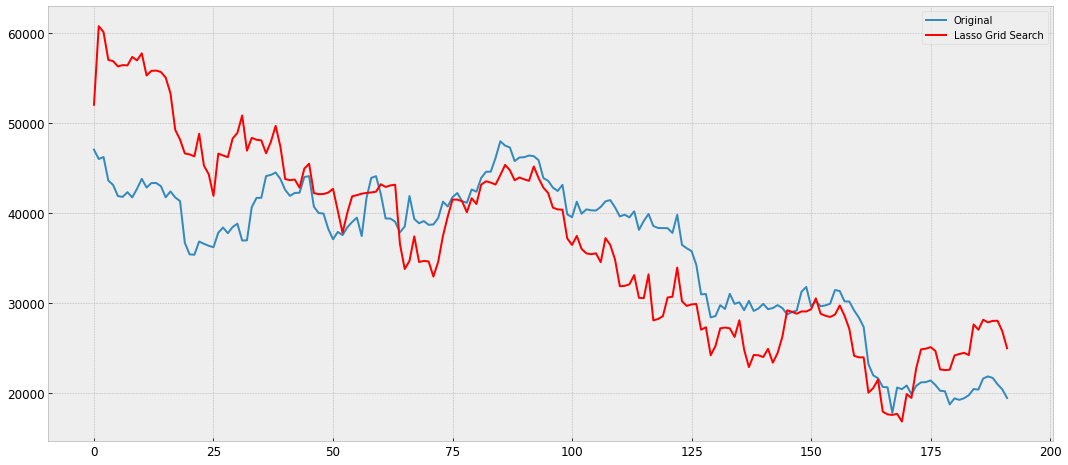

In [ ]:
plt.plot(df_test.XBTUSD.values, label='Original')
plt.plot(yhat, color='red', label='Lasso Grid Search')
plt.legend()

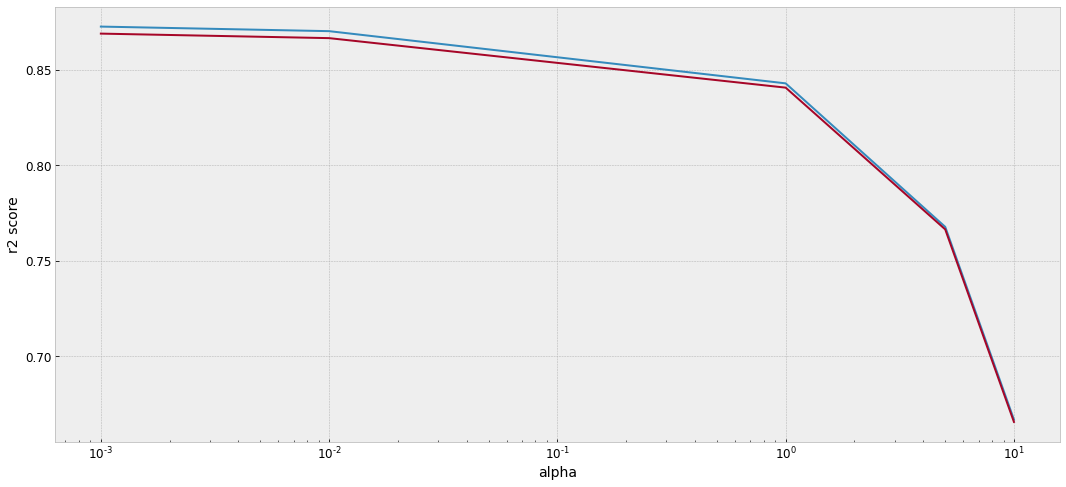

In [ ]:
# plot
cv_results_en['param_alpha'] = cv_results_en['param_alpha'].astype('float32')
plt.plot(cv_results_en['param_alpha'], cv_results_en['mean_train_score'])
plt.plot(cv_results_en['param_alpha'], cv_results_en['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

In [ ]:
# 2.XGBoost

In [ ]:
# We split our dataset to be able to evaluate our models

resultsDict = {}
predictionsDict = {}

split_date = '2022-07-01'
df_training = bf.loc[bf.index <= split_date]
df_test = bf.loc[bf.index > split_date]
print(f"{len(df_training)} days of training data \n {len(df_test)} days of testing data ")

1658 days of training data 
 11 days of testing data 


In [ ]:
train = bf[0:1658]
test = bf[1658:]

In [ ]:
X_train_df, y_train = create_time_features(
    df_training, target='XBTUSD')
X_test_df, y_test = create_time_features(df_test, target='XBTUSD')
scaler = StandardScaler()
scaler.fit(X_train_df)  # No cheating, never scale on the training+test!
X_train = scaler.transform(X_train_df)
X_test = scaler.transform(X_test_df)

X_train_df = pd.DataFrame(X_train, columns=X_train_df.columns)
X_test_df = pd.DataFrame(X_test, columns=X_test_df.columns)

In [ ]:
reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000)
reg.fit(X_train, y_train,
        verbose=False)  # Change verbose to True if you want to see it train
yhat = reg.predict(X_test)
resultsDict['XGBoost'] = evaluate(df_test.XBTUSD, yhat)
predictionsDict['XGBoost'] = yhat

Unable to compute metric mda: ('Lengths must match to compare', (11,), (10,))


In [ ]:
resultsDict['XGBoost']

{'nrmse': 0.4590246592751235,
 'mape': 0.051702506394280826,
 'mdape': 0.0381667803460746,
 'smape': 0.0500230768257952,
 'smdape': 0.037452067921148316,
 'maape': 0.05160770240079628,
 'mase': inf,
 'std_ae': 2273.0599586730473,
 'std_ape': 0.11190407298675939,
 'rmspe': 0.05920970910976082,
 'rmdspe': 0.0381667803460746,
 'rmsse': inf,
 'inrse': 1.3167304437880514,
 'rrse': 1.3167304437880514,
 'mre': -9176340017361.111,
 'rae': 1.3734518543711318,
 'mrae': 9517323350694.447,
 'mdrae': nan,
 'gmrae': nan,
 'mbrae': 0.9999999999998312,
 'umbrae': 5925788983381.231,
 'mda': nan,
 'bias': -1024.5886434659092,
 'r2': -0.7337790615982787,
 'mse': 1432629.8387517512,
 'rmse': 1196.9251600462542,
 'me': -1024.5886434659092,
 'mae': 1052.4872798295457,
 'mad': 1052.4872798295457,
 'gmae': 873.3575081267268,
 'mdae': 822.1602343749983}

In [ ]:
xgb1 = xgb.XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

In [ ]:
xgb_grid.fit(X_train, y_train,
        verbose=False)  # Change verbose to True if you want to see it train
yhat = model.predict(X_test)
resultsDict['XGBoost Grid Search'] = evaluate(df_test.XBTUSD, yhat)
predictionsDict['XGBoost Grid Search'] = yhat

Fitting 2 folds for each of 9 candidates, totalling 18 fits
Unable to compute metric mda: ('Lengths must match to compare', (11,), (10,))


In [ ]:
resultsDict['XGBoost Grid Search']

{'nrmse': 0.4403017167503164,
 'mape': 0.04266253520495201,
 'mdape': 0.024568634631157705,
 'smape': 0.0441067314613524,
 'smdape': 0.024874197162066864,
 'maape': 0.0425860508914599,
 'mase': inf,
 'std_ae': 898.1196671508864,
 'std_ape': 0.04179825859156657,
 'rmspe': 0.05347114990077227,
 'rmdspe': 0.024568634631157705,
 'rmsse': inf,
 'inrse': 1.263022940451218,
 'rrse': 1.263022940451218,
 'mre': 9417051909722.223,
 'rae': 1.175617640703326,
 'mrae': 10184430555555.559,
 'mdrae': nan,
 'gmrae': nan,
 'mbrae': 0.9999999999997501,
 'umbrae': 4001421259324.185,
 'mda': nan,
 'bias': 775.0420383522727,
 'r2': -0.5952269481060415,
 'mse': 1318143.5720713143,
 'rmse': 1148.1043384951188,
 'me': 775.0420383522727,
 'mae': 900.8853196022733,
 'mad': 900.8853196022733,
 'gmae': 617.2842611664956,
 'mdae': 501.4345312500009}

In [ ]:
predictionsDict['XGBoost Grid Search'] 

array([18842.057, 19516.58 , 20005.07 , 19546.82 , 19984.926, 19687.035,
       19759.303, 19757.646, 19869.627, 19908.105, 19790.098],
      dtype=float32)

In [ ]:
increase = 1 - (resultsDict['XGBoost Grid Search']
                ['r2']/resultsDict['XGBoost']['mse'])
print(
    f"Grid search Tunned XGBoost is {increase*100}% better than the XGBoost with default parameters")

Grid search Tunned XGBoost is 100.0000415478536% better than the XGBoost with default parameters


In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
cv_results_en = pd.DataFrame(xgb_grid.cv_results_)
cv_results_en.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,param_nthread,param_objective,param_silent,param_subsample,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,3.324943,0.382742,0.061432,0.016039,0.7,0.03,5,4,500,4,reg:linear,1,0.7,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",-4.391419,-1.818484,-3.104952,1.286467,2
1,4.406768,0.290704,0.083851,0.000682,0.7,0.03,6,4,500,4,reg:linear,1,0.7,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",-4.624899,-1.826143,-3.225521,1.399378,5
2,5.425863,0.024497,0.093892,0.002991,0.7,0.03,7,4,500,4,reg:linear,1,0.7,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",-4.572962,-1.844407,-3.208684,1.364277,4
3,3.734269,0.097843,0.063164,0.005730,0.7,0.05,5,4,500,4,reg:linear,1,0.7,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",-4.968441,-1.842512,-3.405476,1.562964,8
4,4.945522,0.001092,0.067836,0.003898,0.7,0.05,6,4,500,4,reg:linear,1,0.7,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",-4.321364,-1.847796,-3.084580,1.236784,1


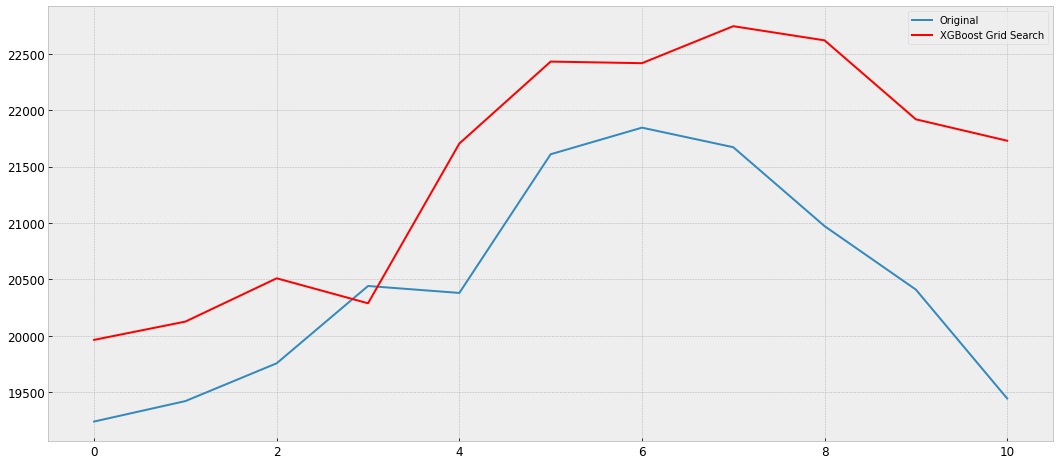

In [ ]:
plt.plot(df_test.XBTUSD.values, label='Original')
plt.plot(yhat, color='red', label='XGBoost Grid Search')
plt.legend()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
results = pd.DataFrame(zip(y_test, y_pred, y_test - y_pred), columns = ['y_test', 'y_pred', 'error'])
results.head(10)

,y_test,y_pred,error
0,19238.99,18842.056641,396.933359
1,19420.48,19516.580078,-96.100078
2,19755.85,20005.070312,-249.220313
3,20441.63,19546.820312,894.809688
4,20380.00,19984.925781,395.074219
5,21610.58,19687.035156,1923.544844
6,21846.53,19759.302734,2087.227266
7,21672.98,19757.646484,1915.333516
8,20972.87,19869.626953,1103.243047
9,20409.54,19908.105469,501.434531


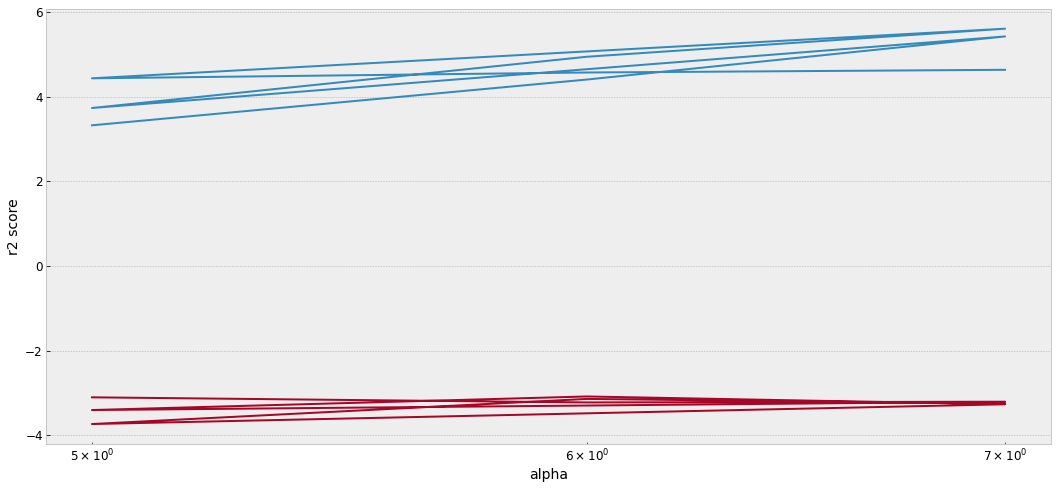

In [ ]:
# plot
cv_results_en['param_max_depth'] = cv_results_en['param_max_depth'].astype('float32')
plt.plot(cv_results_en['param_max_depth'], cv_results_en['mean_fit_time'])
plt.plot(cv_results_en['param_max_depth'], cv_results_en['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()